In [0]:
## Import testing_images.npz and examples.npz into the file
!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz

--2020-05-27 16:37:42--  http://users.sussex.ac.uk/~is321/test_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74915629 (71M)
Saving to: ‘test_images.npz’

test_images.npz     100%[===================>]  71.44M  57.0MB/s    in 1.3s    

2020-05-27 16:37:43 (57.0 MB/s) - ‘test_images.npz’ saved [74915629/74915629]

--2020-05-27 16:37:44--  http://users.sussex.ac.uk/~is321/examples.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777627 (759K)
Saving to: ‘examples.npz’

examples.npz        100%[===================>] 759.40K  4.36MB/s    in 0.2s    

2020-05-27 16:37:45 (4.36 MB/s) - ‘examples.npz’ saved [777627/777627]



In [0]:
import numpy as np

## Pre-processing on training data for Segmentation

# Load data from testing_images.npz
data = np.load('test_images.npz',allow_pickle=True)

# Stores the images from data in variable to represent training images
colourImages = data['images']

In [0]:
from sklearn.cluster import KMeans
import cv2
import matplotlib.pyplot as plt

## Functions to complete segmentation tasks

## drawSegmentation is used to draw the original image and a segmented version of same image
def drawSegmentation(image, seg):

  # Sets up the features of each figure
  fig = plt.figure(figsize=(15, 5))
  
  # Sets up a value to be used for generating colours
  num = np.max(seg)+1

  # Creates a set of colours to be used for segmentation
  colours = np.random.rand(*(num, 3))

  # Plot original image in first position
  plt.subplot(131)
  plt.imshow(image)

  # Create a new image of zeros in the shape of (number of segments,3)
  segmentImage = np.zeros((seg.shape[0],3), dtype=np.uint8)
  
  # Reshape the image
  flat = np.reshape(image, (-1, 3))

  # Loop through the different colours
  for i in range(num):
    # Finalises the new image
    segmentImage[seg==i,:] = np.uint8(colours[i,:]*255)

  # Display the new segmented image, in the second position
  # Reshape the image to be same shape as original image (250x250)
  plt.subplot(132)
  plt.imshow(np.reshape(segmentImage, image.shape))
  plt.show()

## segmentImage is used to setup the image and kmeans
# calls the function to perform and display segmentation operation
def segmentImage(image, clusters=2):
  # Reshape occurs here due to issues reshaping in pre-processing section
  reshape = np.reshape(image, (62500,3))
  # Uses KMeans from sklearn.cluster to generate labels to be used later
  kmeans = KMeans(n_clusters=clusters, random_state=0).fit(reshape)
  # Calls drawSegmentation with image labels of kmeans
  drawSegmentation(image, kmeans.labels_)

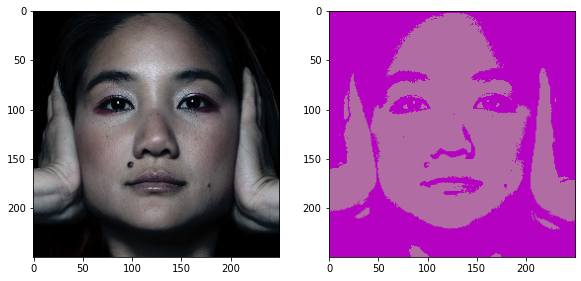

In [0]:
## Output an image and its segmented version with x clusters
segmentImage(colourImages[87], 2)

In [0]:
## Import example data
example = np.load('examples.npz',allow_pickle=True)

# Stores the images from data in variable to represent training images
colourImages = example['images']

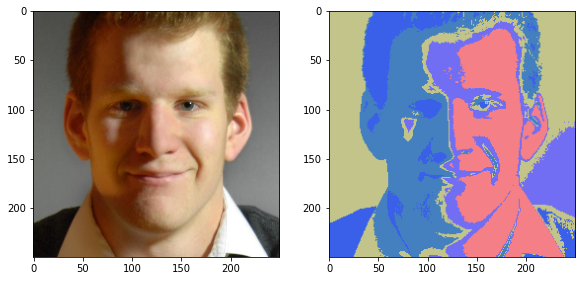

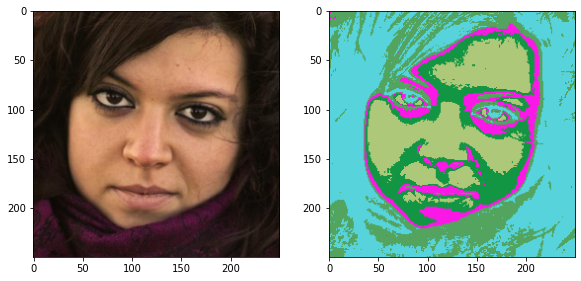

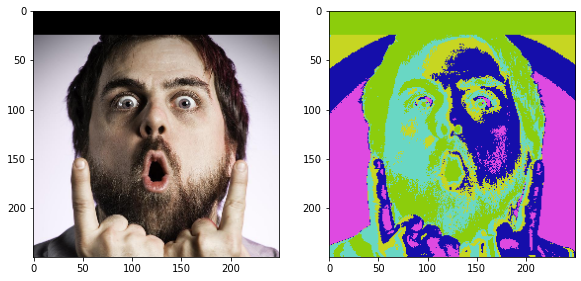

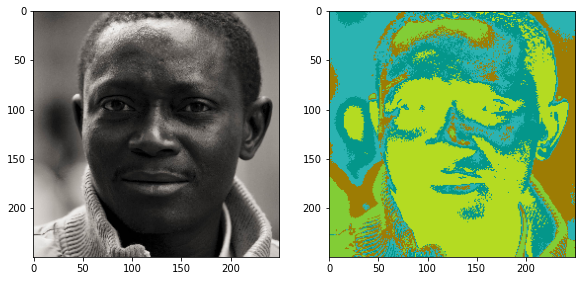

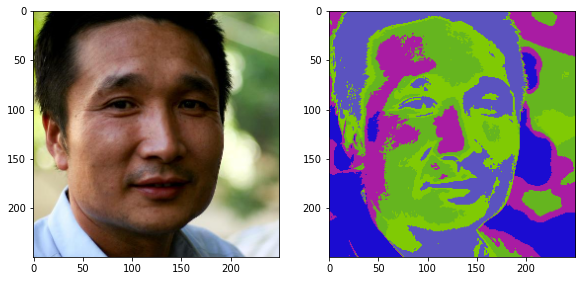

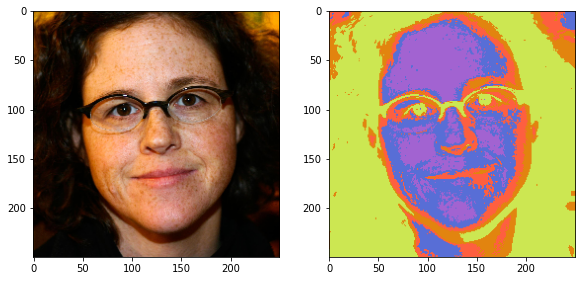

In [0]:
## Display all example images and segmented version
for i in range(6):
    # Specify the image and number of clusters of each segmentation
    segmentImage(colourImages[i], 5)